I will integrate all the kestrel data at once taking into account new data that is going to be read differently


In [1]:
import os
import pandas as pd
from weather_data import WeatherFile, VerticalProfile
from dataManagement import DataQuality
from pytz import timezone
from datetime import datetime as dt
import numpy as np

In [2]:
#Open each file and filter by dates located in the summary file
def filter_merge(df_filter_st, station, dir_name,date_field):
    tz_date=timezone('America/Bogota')
    start_date_field='startFilterIn'
    end_date_field='endFilterIn'
    #Create object to manipulate data format
    w_obj=WeatherFile('NA')
    df_station_data=pd.DataFrame()
    df_filter_st[start_date_field]=pd.to_datetime(df_filter_st[start_date_field], infer_datetime_format=True)
    df_filter_st[end_date_field]=pd.to_datetime(df_filter_st[end_date_field], infer_datetime_format=True)

    for items, row in df_filter_st.iterrows():
        file_name=row['File']
        #Read file with data
        df_file = pd.read_csv(dir_name+station+'/' + file_name, sep=',', header=3)
        #erase first row
        df_file=df_file.drop([0])

        #rename columns
        df_file=w_obj.rename_cols(df_file)
        #TODO: Convert pressure to numeric

        #Select columns that are numeric
        cols =df_file.drop(['bp','p'], axis=1).columns[1:]
        # add time col format

        df_data = w_obj.add_time_cols(df_file, date_field)
        #Convert cols to numeric
        df_data[cols] = df_data[cols].apply(pd.to_numeric, errors='coerce')
        #filter invalid dates
        start_date = tz_date.localize(row[start_date_field])
        end_date = tz_date.localize(row[end_date_field])
        df_data = df_data[(df_data[date_field] > start_date) & (df_data[date_field] < end_date)].copy()
        df_data['height']=int(row['Height'])
        df_data['station']=row['Station']
        df_station_data = pd.concat([df_station_data, df_data],ignore_index=True)#cambio
        #df_station_data=df_station_data.append(df_data, ignore_index=True)original
      
    return df_station_data

# #Open each file and filter by dates located in the summary file
# def filter_merge(df_filter_st, station, dir_name,date_field):
#     tz_date=timezone('America/Bogota')
#     start_date_field='startFilterIn'
#     end_date_field='endFilterIn'
#     #Create object to manipulate data format
#     w_obj=WeatherFile('NA')
#     df_station_data=pd.DataFrame()
#     for items, row in df_filter_st.iterrows():
#         file_name=row['File']
#         #Read file with data
#         df_file = pd.read_csv(dir_name+station+'/' + file_name, sep=',', header=3)
#         #erase first row
#         df_file=df_file.drop([0])

#         #rename columns
#         df_file=w_obj.rename_cols(df_file)
#         #TODO: Convert pressure to numeric

#         #Select columns that are numeric
#         cols =df_file.drop(['bp','p'], axis=1).columns[1:]
#         # add time col format

#         df_data = w_obj.add_time_cols(df_file, date_field)
#         #Convert cols to numeric
#         df_data[cols] = df_data[cols].apply(pd.to_numeric, errors='coerce')
#         #filter invalid dates
#         start_date = tz_date.localize(dt.strptime(row[start_date_field],'%m/%d/%Y %H:%M:%S'))#'%m/%d/%Y %H:%M:%S')
#         end_date = tz_date.localize(dt.strptime(row[end_date_field],'%m/%d/%Y %H:%M:%S'))
#         df_data = df_data[(df_data[date_field] > start_date) & (df_data[date_field] < end_date)]
#         df_data['height']=int(row['Height'])
#         df_data['station']=row['Station']
#         df_station_data = pd.concat([df_station_data, df_data],ignore_index=True)#cambio
#         #df_station_data=df_station_data.append(df_data, ignore_index=True)original
#     return df_station_data

In [3]:
#Get data Kestrel
dw = os.getcwd()
os.chdir("..")
dir_name = os.getcwd() + "/data/nuevo_mantenimiento_kestrel/"

os.chdir(dw)
#Read file with dates to filter by file
f_name_filter='summary_data_kestrel.csv'
df_filter_dates=pd.read_csv(dir_name + f_name_filter,sep=',')

In [4]:
#Individual files generated for Leonardo
#Filter maintance data
#General archivos individuales
# dq=DataQuality()
# # height= 2
# date_field = 'dtime'
# station = 'LP'
# df_filter_st=df_filter_dates[(df_filter_dates['Station']==station)]
# #Get min and max date of the dataset
# min_date=pd.to_datetime(df_filter_dates['Report Date']).min()
# max_date=pd.to_datetime(df_filter_dates['Report Date']).max()
# #Call function that filters
# df_station_data=filter_merge(df_filter_st, station, dir_name,date_field)
#
# #filter maintance
# df_station_data_final=dq.filter_maintenance(df_station_data, date_field, station)
#
# df_data_leo=df_station_data_final[(df_station_data_final['date_h']>=min_date.to_period('H'))&
#                                  (df_station_data_final['date_h']<=max_date.to_period('H'))]
# min_date=min_date.strftime('%Y-%m-%d')
# max_date=max_date.strftime('%Y-%m-%d')
# df_station_data.to_csv(dir_name+station+'/' +station+'_vertical_profile_hour_NF' + "_" + min_date + "_" + max_date + ".csv", sep=',', encoding='utf-8')
# df_station_data_final.to_csv(dir_name+station+'/' +station+'_vertical_profile_hour' + "_" + min_date + "_" + max_date + ".csv", sep=',', encoding='utf-8')
# df_data_leo.to_csv(dir_name+'/toLeo_' +station+'_vertical_profile_hour' + "_" + min_date + "_" + max_date + ".csv", sep=',', encoding='utf-8')

In [4]:
#Filter maintance data
#General todo el dataframe
dq=DataQuality()
# height= 2
date_field = 'dtime'
stations=['BA','LP','SI']
df_final_v=pd.DataFrame()
for station in stations:
    df_filter_st=df_filter_dates[(df_filter_dates['Station']==station)]
    #Get min and max date of the dataset
    print(pd.to_datetime(df_filter_dates['Report Date']).min())
    print(pd.to_datetime(df_filter_dates['Report Date']).max())
    #Call function that filters
    df_station_data=filter_merge(df_filter_st, station, dir_name,date_field)
    #filter maintance
    df_station_data_final=dq.filter_maintenance(df_station_data, date_field, station).copy()
    df_final_v = pd.concat([df_final_v, df_station_data_final],ignore_index=True)#cambio
    #df_final_v=df_final_v.append(df_station_data_final, ignore_index=True)original

#Replace comma (,) in p and bp columns and convert both columns to number
df_final_v['p']=df_final_v['p'].str.replace(',','',regex=False)
df_final_v['bp']=df_final_v['bp'].str.replace(',','',regex=False)
df_final_v[['p','bp']]=df_final_v[['p','bp']].apply(pd.to_numeric, errors='coerce')

2020-08-07 00:00:00
2021-07-30 00:00:00


C:\Users\catherine\AppData\Local\Temp\ipykernel_1784\763802987.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter_st[start_date_field]=pd.to_datetime(df_filter_st[start_date_field], infer_datetime_format=True)
C:\Users\catherine\AppData\Local\Temp\ipykernel_1784\763802987.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter_st[end_date_field]=pd.to_datetime(df_filter_st[end_date_field], infer_datetime_format=True)
C:\Users\catherine\anaconda3\lib\site-packages\pandas\core\arrays\datetim

Field is already datetime
2020-08-07 00:00:00
2021-07-30 00:00:00


C:\Users\catherine\AppData\Local\Temp\ipykernel_1784\763802987.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter_st[start_date_field]=pd.to_datetime(df_filter_st[start_date_field], infer_datetime_format=True)
C:\Users\catherine\AppData\Local\Temp\ipykernel_1784\763802987.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter_st[end_date_field]=pd.to_datetime(df_filter_st[end_date_field], infer_datetime_format=True)
C:\Users\catherine\anaconda3\lib\site-packages\pandas\core\arrays\datetim

Field is already datetime
2020-08-07 00:00:00
2021-07-30 00:00:00


C:\Users\catherine\AppData\Local\Temp\ipykernel_1784\763802987.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter_st[start_date_field]=pd.to_datetime(df_filter_st[start_date_field], infer_datetime_format=True)
C:\Users\catherine\AppData\Local\Temp\ipykernel_1784\763802987.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter_st[end_date_field]=pd.to_datetime(df_filter_st[end_date_field], infer_datetime_format=True)
C:\Users\catherine\anaconda3\lib\site-packages\pandas\core\arrays\datetim

Field is already datetime


In [5]:
#Get old data
profile = VerticalProfile('A') #Create the object for atmosphere

#We have a problem for BA?????

devices = {'2442707': ['BA', 10],
           '2442705': ['BA', 9],
           '2442709': ['BA', 2],
           '2442708': ['LP', 10],
           '2443159': ['LP', 9],
           '2443160': ['LP', 2],
           '2489058': ['SI', 10],
           '2442710': ['SI', 9],
           '2442706': ['SI', 2]}


cols = ['dtime', 'tdew', 'wbt', 'rh', 'tair',
        'wspeed', 'day', 'month', 'year', 'year_month', 'hour']


# # TODO: Make the station, height and device added into the get_data function
df_all_v = pd.DataFrame()
for device, info in devices.items():
    # print('Hola')
    df = profile.get_data(device, end_date='2020-06-30')
    df_selected = df.copy()#[cols]
    df_selected['station'] = info[0]
    df_selected['height'] = info[1]
    #df_selected['device'] = device
    df_all_v = pd.concat([df_all_v, df_selected])#cambio
    #df_all_v = df_all_v.append(df_selected)original
#     # How to work with dictionaries https://www.youtube.com/watch?v=IpbYrguvai0

C:\Users\catherine\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\Users\catherine\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\Users\catherine\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\Users\catherine\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\Users\catherine\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\Users\catherine\anaconda3\l

In [9]:
#Replace comma (,) in p and bp columns and convert both columns to number
df_all_v['p']=df_all_v['p'].str.replace(',','',regex=False)
df_all_v['bp']=df_all_v['bp'].str.replace(',','',regex=False)
#Convert p and bp to numeric
df_all_v[['p','bp']]=df_all_v[['p','bp']].apply(pd.to_numeric, errors='coerce')
#

In [7]:
#Join two datasets
df_final_v1=df_final_v.drop_duplicates(subset=['station','height','dtime'], keep='first').copy()
cols=df_final_v1.columns
df_vertical=pd.DataFrame()
df_vertical = pd.concat([df_vertical, df_all_v[cols]])#cambio
df_vertical = pd.concat([df_vertical, df_final_v1])#cambio
# df_vertical=df_vertical.append(df_all_v[cols])original
# df_vertical=df_vertical.append(df_final_v1)original

In [8]:
##TODO: Replace here to save to database
#Save all dataset to disk
df_vertical.to_csv(dir_name+'_vertical_profile_hour_all.csv', sep=',', encoding='utf-8')

In [9]:
#Count what I have per each station height in each kestrel
df=df_vertical
df_stats_month_k = pd.DataFrame()
df_stats_day_k = pd.DataFrame()
stations=['BA','LP','SI']
heights=[10,9,2]
station_field='station'
height_field='height'
date='dtime'
for st in stations:
    for h in heights:
        df_st_h=df[(df[station_field]==st)&(df[height_field]==h)]
        df_stats_m_k = dq.count_data(df_st_h, 'year_month')
        df_stats_d_k = dq.count_data(df_st_h, 'day')
        df_stats_d_k['days_complete'] = df_stats_d_k[date] / 24
        # Validate the date when fequency change from 1 hour to every 20 min
        if st == 'SI':
            date_change = '02/11/2020 11:00'
        elif st == 'LP':
            date_change = '02/13/2020 16:00'
        else:
            date_change = '02/12/2020 09:00'
        df_stats_d_k['days_complete'] = df_stats_d_k['days_complete'].where(df_stats_d_k['day'] < date_change,
                                                                            df_stats_d_k['dtime'] / 72)
        df_stats_d_k[station_field] = st
        df_stats_d_k[height_field] = h
        df_stats_day_k = pd.concat([df_stats_day_k, df_stats_d_k])#cambio
        #df_stats_day_k = df_stats_day_k.append(df_stats_d_k)original
        df_stats_m_k[station_field] = st
        df_stats_m_k[height_field] = h
        df_stats_month_k = pd.concat([df_stats_month_k, df_stats_m_k])#cambio        
        #df_stats_month_k = df_stats_month_k.append(df_stats_m_k)original
df_stats_day_k['year_month'] = df_stats_day_k['day'].dt.to_timestamp('s').dt.to_period('M')

KeyError: 'station'

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig=make_subplots(rows=3, cols=3)
for st in stations:
    for h in heights:
        df=df_vertical[(df_vertical[height_field]==h)&(df_vertical[station_field]==st)]
        fig.add_trace(go.Scatter(x=df['dtime'],y=df['tair'],
                             mode='lines',
                             name= str(h)+ " m"),
                      row=heights.index(h)+1,
                      col=stations.index(st)+1)
fig.show()

In [ ]:
#1. Read data until september
#2. Read data until October 31 2020

In [5]:
def get_all_arable():
    dw = os.getcwd()
    os.chdir("..")

    dir_arable=os.getcwd() +'/data/Datos_Arable_Hasta_09122020/'
    dir_arable_new=os.getcwd() +'/data/Arable/'
    os.chdir(dw)

    fn_arable=['ba_arable_hour_2019-08-15_2020-09-12.csv', 'lp_arable_hour_2019-08-15_2020-09-12.csv','si_arable_hour_2019-08-15_2020-09-12.csv']
    fn_arable_n=['ba_arable_hour_2020-09-11_2021-07-04.csv', 'lp_arable_hour_2020-09-11_2021-07-04.csv','si_arable_hour_2020-07-23_2021-07-04.csv']
    df_arable=pd.DataFrame()
    for fn in fn_arable:
        df_arable_st=pd.read_csv(dir_arable + fn, sep=',')
        df_arable_st_new=pd.read_csv(dir_arable_new+fn_arable_n[fn_arable.index(fn)],sep=',')
        max_date=max(df_arable_st['dtime'])
        print(max_date)
        df_arable_st_new=df_arable_st_new[df_arable_st_new['dtime']>max_date]
        df_arable = pd.concat([df_arable, df_arable_st], ignore_index=True)#cambio
        #df_arable=df_arable.append(df_arable_st, ignore_index=True)original
        df_arable = pd.concat([df_arable, df_arable_st_new], ignore_index=True)#cambio
        #df_arable=df_arable.append(df_arable_st_new, ignore_index=True)original

    df_arable['height']=11

    #Drop first columns index from export
    df_arable=df_arable[df_arable.columns[1:]]

    return df_arable

2020-09-11 19:00:00-05:00
2020-09-11 19:00:00-05:00
2020-07-23 07:00:00-05:00


In [6]:
df_arable=get_all_arable()

'2021-06-14 14:00:00-05:00'

In [8]:
#Load arable stats
df=df_arable
dq=DataQuality()
df_stats_day_a = pd.DataFrame()
df_stats_month_a = pd.DataFrame()
station_f='station'
date_field = 'dtime'
for st in ['BA', 'LP', 'SI']:
    df_st = df[df[station_f] == st]
    df_count_d = dq.count_data(df_st, 'day')
    df_count_d[station_f] = st
    df_count_m = dq.count_data(df_st, 'year_month')
    df_count_m[station_f] = st
    df_count_d['days_complete'] = df_count_d['dtime'] / 24
    df_count_d['year_month'] = pd.to_datetime(df_count_d['day']).dt.to_period('M')
    df_count_d['height'] = 11
    df_count_m['height'] = 11
    df_stats_month_a = pd.concat([df_stats_month_a, df_count_m], ignore_index=True)#cambio
    #df_stats_month_a=df_stats_month_a.append(df_count_m, ignore_index=True)original
    df_stats_day_a = pd.concat([df_stats_day_a, df_count_d], ignore_index=True)#cambio
    #df_stats_day_a=df_stats_day_a.append(df_count_d, ignore_index=True)original

/home/angelica/.virtualenvs/stations_integrated/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


NameError: name 'plt' is not defined

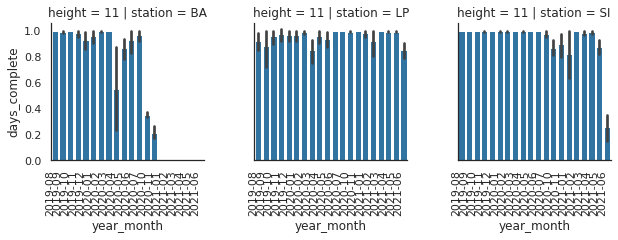

In [11]:
#Plotting complete data
import seaborn as sns

sns.set_context('notebook')
sns.set_style('white')

order_months=['2019-08','2019-09','2019-10','2019-11','2019-12',
              '2020-01','2020-02','2020-03','2020-04','2020-05',
              '2020-06','2020-07','2020-08','2020-09','2020-10',
              '2020-11','2020-12','2021-01','2021-02','2021-03',
              '2021-04','2021-05','2021-06']
# df_stats_day_k.sort_values(['year_month','station','height'])
g = sns.FacetGrid(pd.concat([df_stats_day_a[['station','height','year_month','days_complete']],(df_stats_day_a[['station','height','year_month','days_complete']])],
                  row='height', col='station')#cambio
#g = sns.FacetGrid(df_stats_day_a[['station','height','year_month','days_complete']].append(df_stats_day_a[['station','height','year_month','days_complete']]),
#                  row='height', col='station')original
plotm = g.map(sns.barplot, "year_month", "days_complete")
plotm.set_xticklabels(rotation=90, horizontalalignment='right')
